## 📚 Bibliotecas

In [104]:
import pandas as pd
import requests
import matplotlib.pyplot as plt
import numpy as np


## 📌 Extracción

In [70]:
# URL del JSON crudo, de donde obtenemos la información:
url = "https://raw.githubusercontent.com/alura-cursos/challenge2-data-science-LATAM/refs/heads/main/TelecomX_Data.json"

In [71]:
# Descargar datos
response = requests.get(url)

# No continúo el proceso si la fuente de datos no respondió correctamente
response.raise_for_status()

# Convierto la respuesta JSON de la API en estructuras de datos de Python
data_json = response.json()

In [72]:
# Convertir los datos a un DataFrame de Pandas
df = pd.DataFrame(data_json)
df

,customerID,Churn,customer,phone,internet,account
0,0002-ORFBO,No,"{'gender': 'Female', 'SeniorCitizen': 0, 'Part...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'DSL', 'OnlineSecurity': '...","{'Contract': 'One year', 'PaperlessBilling': '..."
1,0003-MKNFE,No,"{'gender': 'Male', 'SeniorCitizen': 0, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'Yes'}","{'InternetService': 'DSL', 'OnlineSecurity': '...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
2,0004-TLHLJ,Yes,"{'gender': 'Male', 'SeniorCitizen': 0, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'Fiber optic', 'OnlineSecu...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
3,0011-IGKFF,Yes,"{'gender': 'Male', 'SeniorCitizen': 1, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'Fiber optic', 'OnlineSecu...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
4,0013-EXCHZ,Yes,"{'gender': 'Female', 'SeniorCitizen': 1, 'Part...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'Fiber optic', 'OnlineSecu...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
...,...,...,...,...,...,...
7262,9987-LUTYD,No,"{'gender': 'Female', 'SeniorCitizen': 0, 'Part...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'DSL', 'OnlineSecurity': '...","{'Contract': 'One year', 'PaperlessBilling': '..."
7263,9992-RRAMN,Yes,"{'gender': 'Male', 'SeniorCitizen': 0, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'Yes'}","{'InternetService': 'Fiber optic', 'OnlineSecu...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
7264,9992-UJOEL,No,"{'gender': 'Male', 'SeniorCitizen': 0, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'DSL', 'OnlineSecurity': '...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
7265,9993-LHIEB,No,"{'gender': 'Male', 'SeniorCitizen': 0, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'DSL', 'OnlineSecurity': '...","{'Contract': 'Two year', 'PaperlessBilling': '..."


## 🔧 Transformación

In [73]:
# Normalizamos las estructuras anidadas del JSON para obtener un DataFrame tabular apto para el análisis
df = pd.json_normalize(data_json)
df

,customerID,Churn,customer.gender,customer.SeniorCitizen,customer.Partner,customer.Dependents,customer.tenure,phone.PhoneService,phone.MultipleLines,internet.InternetService,...,internet.OnlineBackup,internet.DeviceProtection,internet.TechSupport,internet.StreamingTV,internet.StreamingMovies,account.Contract,account.PaperlessBilling,account.PaymentMethod,account.Charges.Monthly,account.Charges.Total
0,0002-ORFBO,No,Female,0,Yes,Yes,9,Yes,No,DSL,...,Yes,No,Yes,Yes,No,One year,Yes,Mailed check,65.60,593.3
1,0003-MKNFE,No,Male,0,No,No,9,Yes,Yes,DSL,...,No,No,No,No,Yes,Month-to-month,No,Mailed check,59.90,542.4
2,0004-TLHLJ,Yes,Male,0,No,No,4,Yes,No,Fiber optic,...,No,Yes,No,No,No,Month-to-month,Yes,Electronic check,73.90,280.85
3,0011-IGKFF,Yes,Male,1,Yes,No,13,Yes,No,Fiber optic,...,Yes,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,98.00,1237.85
4,0013-EXCHZ,Yes,Female,1,Yes,No,3,Yes,No,Fiber optic,...,No,No,Yes,Yes,No,Month-to-month,Yes,Mailed check,83.90,267.4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7262,9987-LUTYD,No,Female,0,No,No,13,Yes,No,DSL,...,No,No,Yes,No,No,One year,No,Mailed check,55.15,742.9
7263,9992-RRAMN,Yes,Male,0,Yes,No,22,Yes,Yes,Fiber optic,...,No,No,No,No,Yes,Month-to-month,Yes,Electronic check,85.10,1873.7
7264,9992-UJOEL,No,Male,0,No,No,2,Yes,No,DSL,...,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,50.30,92.75
7265,9993-LHIEB,No,Male,0,Yes,Yes,67,Yes,No,DSL,...,No,Yes,Yes,No,Yes,Two year,No,Mailed check,67.85,4627.65


In [74]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7267 entries, 0 to 7266
Data columns (total 21 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   customerID                 7267 non-null   object 
 1   Churn                      7267 non-null   object 
 2   customer.gender            7267 non-null   object 
 3   customer.SeniorCitizen     7267 non-null   int64  
 4   customer.Partner           7267 non-null   object 
 5   customer.Dependents        7267 non-null   object 
 6   customer.tenure            7267 non-null   int64  
 7   phone.PhoneService         7267 non-null   object 
 8   phone.MultipleLines        7267 non-null   object 
 9   internet.InternetService   7267 non-null   object 
 10  internet.OnlineSecurity    7267 non-null   object 
 11  internet.OnlineBackup      7267 non-null   object 
 12  internet.DeviceProtection  7267 non-null   object 
 13  internet.TechSupport       7267 non-null   objec

In [75]:
#Tipos de datos en las columnas
df.dtypes

,0
customerID,object
Churn,object
customer.gender,object
customer.SeniorCitizen,int64
customer.Partner,object
customer.Dependents,object
customer.tenure,int64
phone.PhoneService,object
phone.MultipleLines,object
internet.InternetService,object


In [76]:
# Valores nulos?
df.isna().sum()

,0
customerID,0
Churn,0
customer.gender,0
customer.SeniorCitizen,0
customer.Partner,0
customer.Dependents,0
customer.tenure,0
phone.PhoneService,0
phone.MultipleLines,0
internet.InternetService,0


In [77]:
# Valores duplicados?
df.duplicated().sum()

np.int64(0)

In [78]:
# Observamos algunos valores aleatorios
df.sample(6)

,customerID,Churn,customer.gender,customer.SeniorCitizen,customer.Partner,customer.Dependents,customer.tenure,phone.PhoneService,phone.MultipleLines,internet.InternetService,...,internet.OnlineBackup,internet.DeviceProtection,internet.TechSupport,internet.StreamingTV,internet.StreamingMovies,account.Contract,account.PaperlessBilling,account.PaymentMethod,account.Charges.Monthly,account.Charges.Total
1369,1977-STDKI,Yes,Female,1,No,No,1,Yes,No,Fiber optic,...,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,73.00,73
5469,7501-IWUNG,No,Female,0,Yes,Yes,61,Yes,No,DSL,...,No,Yes,Yes,Yes,Yes,Two year,Yes,Bank transfer (automatic),73.80,4616.05
6630,9114-AAFQH,No,Female,0,Yes,No,48,Yes,No,DSL,...,Yes,Yes,No,No,Yes,One year,Yes,Electronic check,65.65,3094.65
6348,8734-FNWVH,No,Male,0,Yes,Yes,31,Yes,Yes,DSL,...,No,No,No,No,Yes,Month-to-month,No,Bank transfer (automatic),59.70,1825.5
3456,4795-KTRTH,Yes,Female,1,Yes,No,5,Yes,Yes,Fiber optic,...,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,81.00,371.65
5492,7526-IVLYU,No,Male,0,No,No,3,Yes,No,No,...,No internet service,No internet service,No internet service,No internet service,No internet service,Month-to-month,Yes,Mailed check,19.65,68.35


In [79]:
# Conocemos el contenido de las columnas:
columnas = list(df.columns)
columnas

['customerID',
 'Churn',
 'customer.gender',
 'customer.SeniorCitizen',
 'customer.Partner',
 'customer.Dependents',
 'customer.tenure',
 'phone.PhoneService',
 'phone.MultipleLines',
 'internet.InternetService',
 'internet.OnlineSecurity',
 'internet.OnlineBackup',
 'internet.DeviceProtection',
 'internet.TechSupport',
 'internet.StreamingTV',
 'internet.StreamingMovies',
 'account.Contract',
 'account.PaperlessBilling',
 'account.PaymentMethod',
 'account.Charges.Monthly',
 'account.Charges.Total']

In [80]:
# Normalizamos strings categóricos básicos
df['Churn'] = df['Churn'].str.strip()
df['account.Contract'] = df['account.Contract'].str.strip()
df['account.PaymentMethod'] = df['account.PaymentMethod'].str.strip()


In [81]:
df['Churn'].unique()
df['account.Contract'].unique()

array(['One year', 'Month-to-month', 'Two year'], dtype=object)

#### Creación de variables derivadas (opcional)

In [82]:
# Creamos una columna de costo diario aproximado a partir del cargo mensual
df['account.Charges.Daily'] = df['account.Charges.Monthly'] / 30
df.head()

,customerID,Churn,customer.gender,customer.SeniorCitizen,customer.Partner,customer.Dependents,customer.tenure,phone.PhoneService,phone.MultipleLines,internet.InternetService,...,internet.DeviceProtection,internet.TechSupport,internet.StreamingTV,internet.StreamingMovies,account.Contract,account.PaperlessBilling,account.PaymentMethod,account.Charges.Monthly,account.Charges.Total,account.Charges.Daily
0,0002-ORFBO,No,Female,0,Yes,Yes,9,Yes,No,DSL,...,No,Yes,Yes,No,One year,Yes,Mailed check,65.6,593.3,2.186667
1,0003-MKNFE,No,Male,0,No,No,9,Yes,Yes,DSL,...,No,No,No,Yes,Month-to-month,No,Mailed check,59.9,542.4,1.996667
2,0004-TLHLJ,Yes,Male,0,No,No,4,Yes,No,Fiber optic,...,Yes,No,No,No,Month-to-month,Yes,Electronic check,73.9,280.85,2.463333
3,0011-IGKFF,Yes,Male,1,Yes,No,13,Yes,No,Fiber optic,...,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,98.0,1237.85,3.266667
4,0013-EXCHZ,Yes,Female,1,Yes,No,3,Yes,No,Fiber optic,...,No,Yes,Yes,No,Month-to-month,Yes,Mailed check,83.9,267.4,2.796667


## 📊 Carga y análisis

#### Análisis descriptivo

In [83]:
# Observamos algunos valores numericos (podrian ayudarnos a tomar ideas):
df.describe()

,customer.SeniorCitizen,customer.tenure,account.Charges.Monthly,account.Charges.Daily
count,7267.000000,7267.000000,7267.000000,7267.000000
mean,0.162653,32.346498,64.720098,2.157337
std,0.369074,24.571773,30.129572,1.004319
min,0.000000,0.000000,18.250000,0.608333
25%,0.000000,9.000000,35.425000,1.180833
50%,0.000000,29.000000,70.300000,2.343333
75%,0.000000,55.000000,89.875000,2.995833
max,1.000000,72.000000,118.750000,3.958333


In [84]:
# Observamos algunos valores, incluyendo objetos:
df.describe(include='object')

,customerID,Churn,customer.gender,customer.Partner,customer.Dependents,phone.PhoneService,phone.MultipleLines,internet.InternetService,internet.OnlineSecurity,internet.OnlineBackup,internet.DeviceProtection,internet.TechSupport,internet.StreamingTV,internet.StreamingMovies,account.Contract,account.PaperlessBilling,account.PaymentMethod,account.Charges.Total
count,7267,7267,7267,7267,7267,7267,7267,7267,7267,7267,7267,7267,7267,7267,7267,7267,7267,7267
unique,7267,3,2,2,2,2,3,3,3,3,3,3,3,3,3,2,4,6531
top,9995-HOTOH,No,Male,No,No,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,20.2
freq,1,5174,3675,3749,5086,6560,3495,3198,3608,3182,3195,3582,2896,2870,4005,4311,2445,11


In [85]:
# Quiero saber por qué Churn tiene 3 tipos de datos:
df['Churn'].unique()

array(['No', 'Yes', ''], dtype=object)

In [86]:
# convertir blancos en NaN
df['Churn'] = df['Churn'].replace('', np.nan)
# eliminar esos registros
df = df.dropna(subset=['Churn'])
# Estos se interpretan como información faltante y se eliminan del análisis.
df['Churn'].unique()

array(['No', 'Yes'], dtype=object)

####  Distribución de evasión

In [87]:
#Realizamos un recuento de clientes
churn_counts = df['Churn'].value_counts()
churn_counts

,count
Churn,
No,5174
Yes,1869


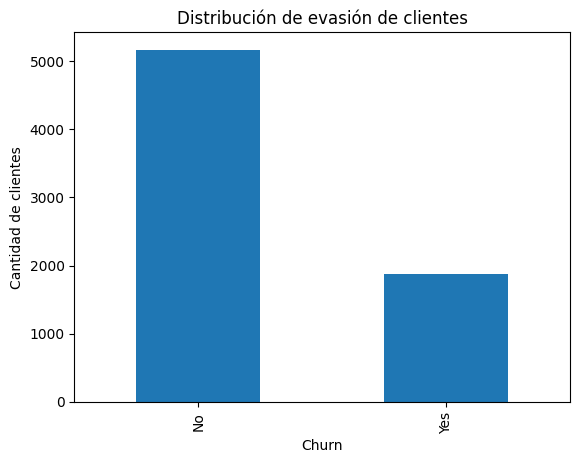

In [88]:
# Un proporcion significativa de evasion justifica el análisis, por eso lo graficamos, para dimensionarlo:
churn_counts.plot(kind='bar')
plt.title('Distribución de evasión de clientes')
plt.xlabel('Churn')
plt.ylabel('Cantidad de clientes')
plt.show()

#### Recuento de evasión por variables categóricas

In [89]:
# Recuento por tipo de contrato
tabla_contrato_churn = pd.crosstab(
    df['account.Contract'],
    df['Churn']
)

tabla_contrato_churn

Churn,No,Yes
account.Contract,,
Month-to-month,2220,1655
One year,1307,166
Two year,1647,48


In [90]:
# Recuento por método de pago:
tabla_tipopago_churn = pd.crosstab(
    df['account.PaymentMethod'],
    df['Churn']
)

tabla_tipopago_churn

Churn,No,Yes
account.PaymentMethod,,
Bank transfer (automatic),1286,258
Credit card (automatic),1290,232
Electronic check,1294,1071
Mailed check,1304,308


In [91]:
# Recuento por suscripcion a más de una línea telefónica:
tabla_MultipleLines_churn = pd.crosstab(
    df['phone.MultipleLines'],
    df['Churn']
)

tabla_MultipleLines_churn

Churn,No,Yes
phone.MultipleLines,,
No,2541,849
No phone service,512,170
Yes,2121,850


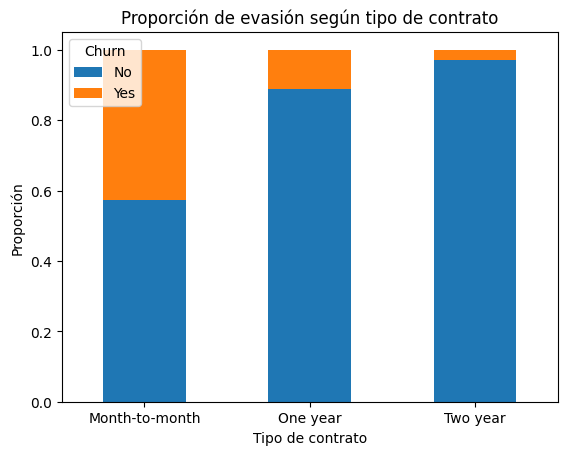

In [95]:
pd.crosstab(df['account.Contract'], df['Churn'], normalize='index').plot(
    kind='bar',
    stacked=True
)
plt.title('Proporción de evasión según tipo de contrato')
plt.xlabel('Tipo de contrato')
plt.ylabel('Proporción')
plt.xticks(rotation=0)
plt.show()

Durante el análisis exploratorio se evaluaron distintas variables categóricas. El tipo de contrato mostró una relación clara con la evasión, concentrándose principalmente en contratos mensuales. El método de pago también evidenció diferencias relevantes, especialmente en clientes que utilizan cheque electrónico. En cambio, la cantidad de líneas telefónicas no mostró una asociación fuerte con el churn.

#### Conteo de evasión por variables numéricas

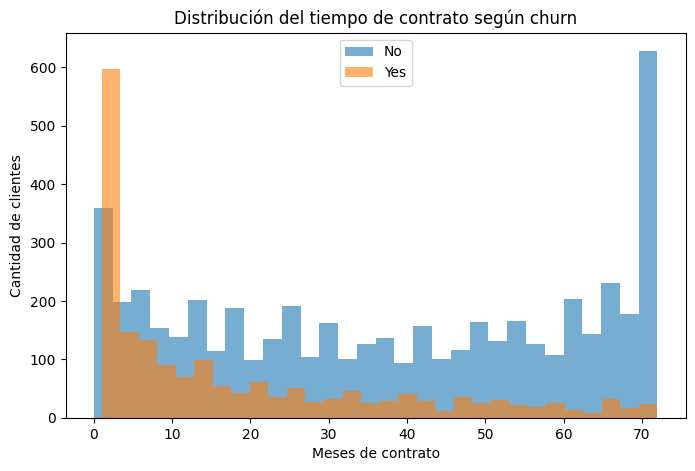

In [102]:
plt.figure(figsize=(8,5))

plt.hist(df[df['Churn'] == 'No']['customer.tenure'], bins=30, alpha=0.6, label='No')
plt.hist(df[df['Churn'] == 'Yes']['customer.tenure'], bins=30, alpha=0.6, label='Yes')

plt.title('Distribución del tiempo de contrato según churn')
plt.xlabel('Meses de contrato')
plt.ylabel('Cantidad de clientes')
plt.legend()
plt.show()

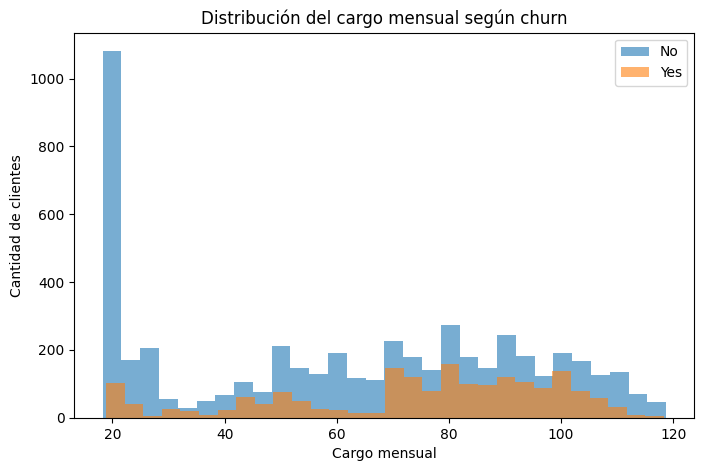

In [103]:
plt.figure(figsize=(8,5))

plt.hist(df[df['Churn'] == 'No']['account.Charges.Monthly'], bins=30, alpha=0.6, label='No')
plt.hist(df[df['Churn'] == 'Yes']['account.Charges.Monthly'], bins=30, alpha=0.6, label='Yes')

plt.title('Distribución del cargo mensual según churn')
plt.xlabel('Cargo mensual')
plt.ylabel('Cantidad de clientes')
plt.legend()
plt.show()

Se compararon las distribuciones de variables numéricas entre clientes que cancelaron y los que no. Se observa que los clientes con churn presentan menor antigüedad promedio y diferencias en los cargos mensuales, lo que sugiere que estas variables podrían estar asociadas a la evasión.

## 📄Informe final

#### Introducción

En este proyecto se analiza el fenómeno de evasión de clientes (churn) en la empresa Telecom X. La organización enfrenta una alta tasa de cancelaciones y necesita comprender qué factores están asociados a la pérdida de clientes.

El objetivo del análisis es explorar los datos disponibles, identificar patrones relevantes y generar insights que puedan servir como base para futuras estrategias de retención.

#### Limpieza y tratamiento de datos

Los datos fueron obtenidos directamente desde una API en formato JSON.
Se realizó la normalización de las estructuras anidadas para convertirlas en un DataFrame tabular utilizando Pandas.

Durante el proceso de limpieza se verificaron valores nulos y registros duplicados. Se detectaron valores en blanco en la variable Churn, los cuales fueron interpretados como información faltante y eliminados del análisis.

Además, se revisaron los tipos de datos de cada columna y se realizaron ajustes menores en variables categóricas para asegurar consistencia.

#### Análisis exploratorio de datos (EDA)

Se analizó la distribución de la evasión según distintas variables categóricas, como tipo de contrato, método de pago y cantidad de líneas telefónicas.

El tipo de contrato mostró una relación clara con la evasión, concentrándose principalmente en clientes con contratos mensuales. El método de pago también evidenció diferencias relevantes, especialmente en clientes que utilizan cheque electrónico. En cambio, la cantidad de líneas telefónicas no mostró una asociación fuerte con el churn.

También se exploraron variables numéricas como el tiempo de contrato y el cargo mensual. Al comparar sus distribuciones entre clientes que cancelaron y los que no, se observó que los clientes con churn presentan menor antigüedad promedio y diferencias en los cargos mensuales.

#### Conclusiones e insights

El análisis exploratorio permitió identificar patrones claros asociados a la evasión de clientes. En particular, el tipo de contrato se presenta como un factor relevante, con una mayor tasa de churn en contratos mensuales.

Asimismo, variables como el método de pago y el tiempo de permanencia muestran diferencias significativas entre clientes que cancelan y los que no, lo que sugiere que el nivel de compromiso del cliente con la empresa es un elemento clave en la retención.

#### Recomendaciones

A partir de los resultados obtenidos, se sugiere que la empresa evalúe estrategias de retención orientadas a clientes con contratos mensuales, como incentivos para migrar a contratos de mayor duración.

También podría analizarse la experiencia de los clientes según el método de pago, especialmente aquellos que utilizan cheque electrónico, con el fin de reducir posibles fricciones administrativas.

Estos insights pueden servir como punto de partida para futuros análisis predictivos y modelos de churn más avanzados.